In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

loading images...
computing disparity...


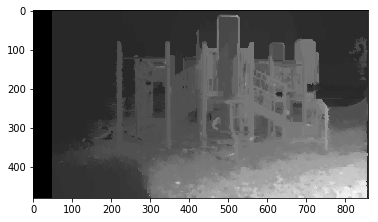

In [4]:
import numpy as np
from sklearn.preprocessing import normalize
import cv2
 
print('loading images...')
imgL = cv2.imread('frame-left.jpg')  
imgR = cv2.imread('frame-right.jpg')

std_img_size = (858,480) #480p at 16:9 resolution

imgL = cv2.resize(imgL, std_img_size)
imgR = cv2.resize(imgR, std_img_size)

window_size = 5                     

left_matcher = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=16*3,             # max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=5,
    P1=8 * 3 * window_size ** 2,    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2,
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)
 
right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
 
# FILTER Parameters
lmbda = 80000
sigma = 1.2
visual_multiplier = 1.0
 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)
 
print('computing disparity...')
displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
displ = np.int16(displ)
dispr = np.int16(dispr)
filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!

filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)
plt.imshow(filteredImg, 'gray')